# <p style="background-color:DarkBlue;color:white;font-family:cursive ;font-size:110%;text-align:center;border-radius: 15px 50px;">1. Introduction</p>

Embark on a transformative journey into the realm of machine learning pipelines with this Titanic competition-inspired notebook! This project draws inspiration from the insightful tutorial (https://www.kaggle.com/code/nnjjpp/pipelines-for-preprocessing-a-tutorial) crafted by Nick Potter, exploring the robust world of pipelines for data preprocessing in machine learning.

**Acknowledgment:**
A special acknowledgment goes to Nick Potter, whose tutorial serves as a guiding beacon for me in understanding the art of pipelines. 
This notebook incorporates and adapts many techniques from his work, providing a hands-on application within the context of the Titanic competition.

**Objectives:**
1. Explore the Titanic dataset, gaining insights into its structure and characteristics.
2. Implement feature engineering techniques inspired by the best practices showcased in Nick Potter's tutorial.
3. Harness the power of machine learning pipelines for streamlined preprocessing of both numerical and categorical features.
4. Build a predictive model, integrating preprocessing and a Logistics Regression for survival predictions.
5. Evaluate the model's performance using relevant metrics.
6. Apply the trained model to the test data and submit predictions on Kaggle.

Let's set sail and unravel the potential of pipelines for enhancing machine learning workflows! 🚢🛠️

# <p style="background-color:DarkBlue;color:white;font-family:cursive ;font-size:110%;text-align:center;border-radius: 15px 50px;">2. Import Libraries</p>

In [1]:
#Basic libraries for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#sklearn library
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, StratifiedKFold, KFold

# <p style="background-color:DarkBlue;color:white;font-family:cursive ;font-size:110%;text-align:center;border-radius: 15px 50px;">3. Load Data</p>

In [2]:
sample = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
train = pd.read_csv('/kaggle/input/titanic/train.csv', index_col = 'PassengerId')
trainX = train.drop(['Survived'], axis=1)
trainy = train['Survived']
test = pd.read_csv('/kaggle/input/titanic/test.csv', index_col = 'PassengerId')

# <p style="background-color:DarkBlue;color:white;font-family:cursive ;font-size:110%;text-align:center;border-radius: 15px 50px;">4. Explore the Data</p>

In [3]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.shape

(891, 11)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


**From Data Dictionary:**

* survival => Survival => 0 = No, 1 = Yes
* pclass => Ticket class => 1 = 1st (Upper), 2 = 2nd (Middle), 3 = 3rd (Lower)
* sex => Sex
* Age => Age in years (Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5)
* sibsp => # of siblings / spouses aboard the Titanic (Sibling = brother, sister, stepbrother, stepsister | Spouse = husband, wife (mistresses and fiancés were ignored))
* parch => # of parents / children aboard the Titanic (Parent = mother, father | Child = daughter, son, stepdaughter, stepson | Some children travelled only with a nanny, therefore parch=0 for them.)
* ticket => Ticket number
* fare => Passenger fare
* cabin => Cabin number 
* embarked => Port of Embarkation =>C = Cherbourg, Q = Queenstown, S = Southampton

In [6]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
#shows as well for non-numeric fields
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [8]:
print('Number of missing values per column')
pd.concat([trainX.isna().sum(0),test.isna().sum(0)], axis=1).rename({0: 'train', 1:'test'}, axis=1)

Number of missing values per column


,train,test
Pclass,0,0
Name,0,0
Sex,0,0
Age,177,86
SibSp,0,0
Parch,0,0
Ticket,0,0
Fare,0,1
Cabin,687,327
Embarked,2,0


In [9]:
train.loc[train.duplicated()]
#check for duplicate values in train data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,


In [10]:
test.loc[test.duplicated()]
#check for duplicate values in test data

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,


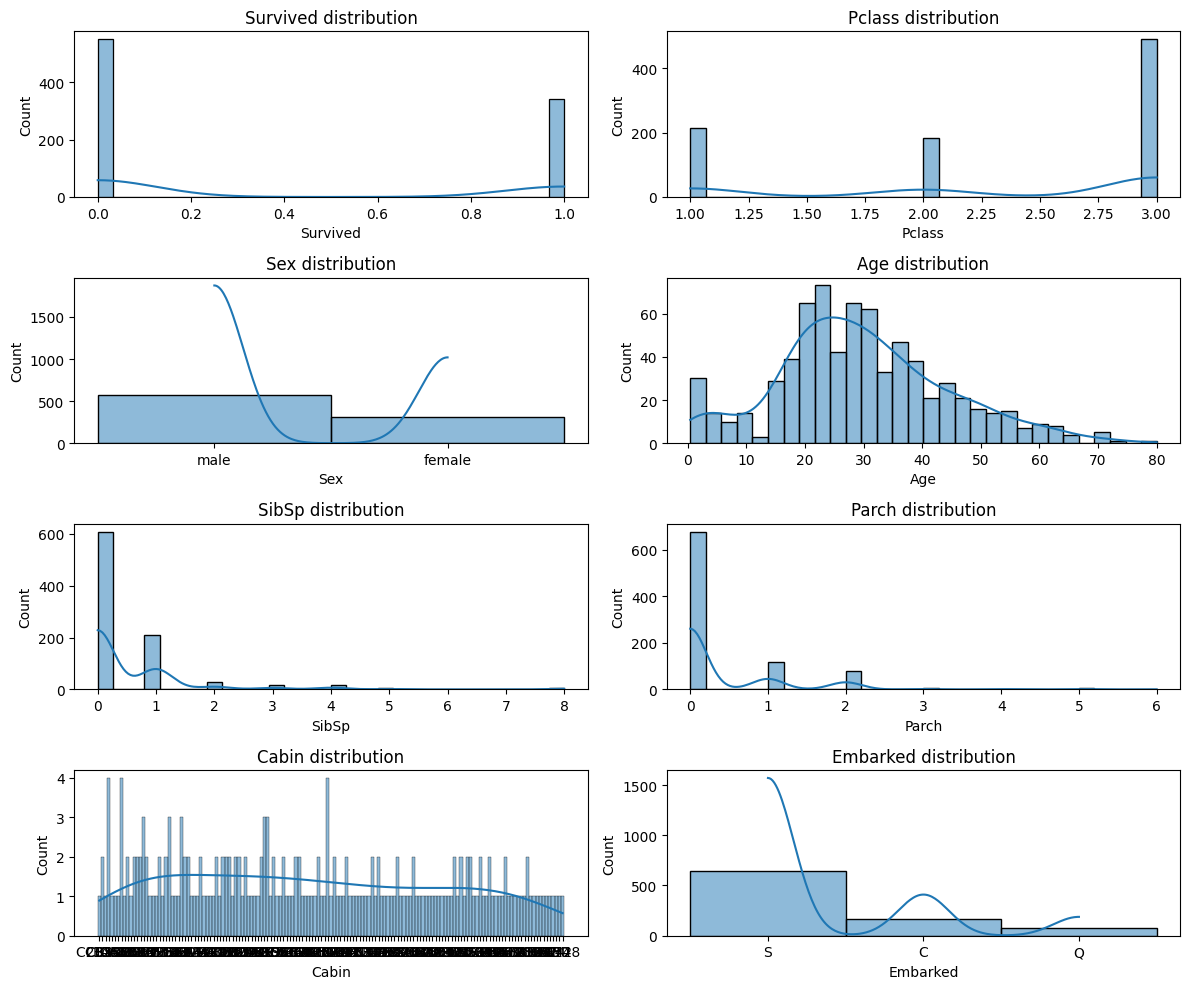

In [11]:
exp_cols = ["Survived","Pclass","Sex","Age","SibSp","Parch","Cabin","Embarked"]
plt.figure(figsize=(12,10))
for i, column in enumerate(exp_cols):
    plt.subplot(4,2, i+1)
    sns.histplot(data=train, x=column, kde=True, bins=30)
    plt.title(f'{column} distribution')
    plt.tight_layout()

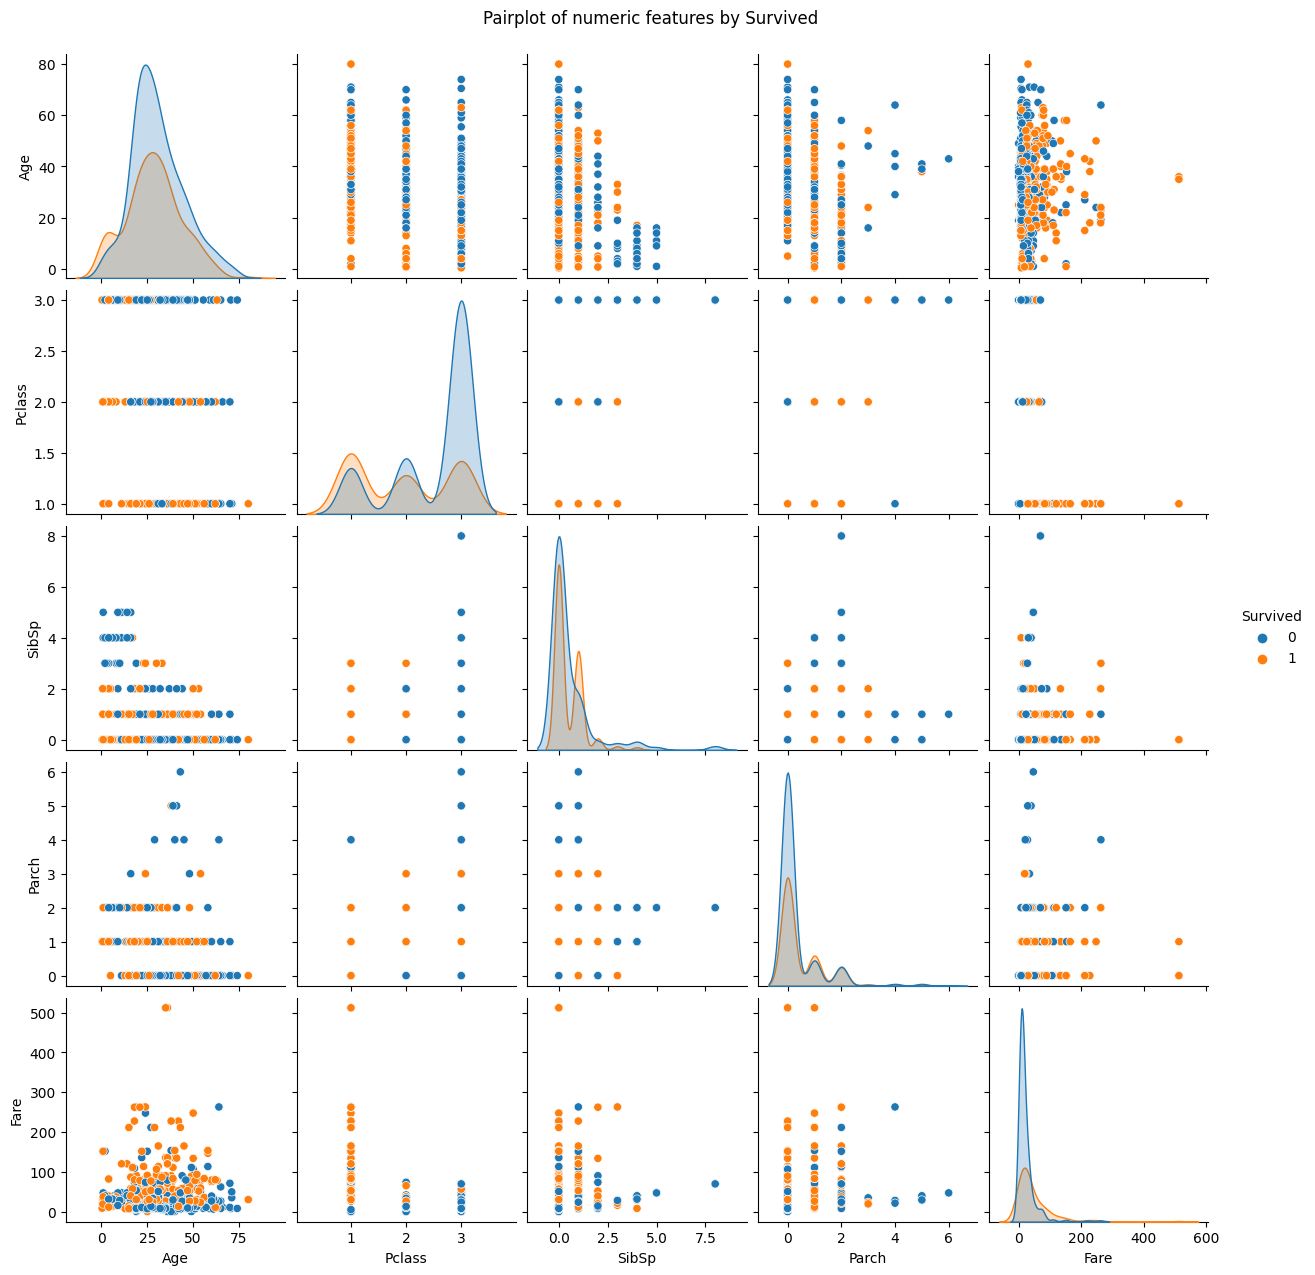

In [12]:
sns.pairplot(train,
             vars=['Age','Pclass','SibSp','Parch','Fare'],
             hue='Survived')
plt.suptitle('Pairplot of numeric features by Survived', y=1.02)
plt.show()

# <p style="background-color:DarkBlue;color:white;font-family:cursive ;font-size:110%;text-align:center;border-radius: 15px 50px;">5. Data Preparation</p>

* The variables 'Sex', 'Cabin' and 'Embarked' are all string (object) variables, and we'll definitely need to do something with them (i.e. encoding) before a numerical model can be used.
* There is potentially some information in 'Ticket', 'Name' and 'Cabin' that could be recovered through feature engineering, such as the title ('Mr.', 'Miss.', etc.).
* The analysis shows that 'Age' and 'Cabin' have missing values in both train and test datasets, whereas 'Embarked' and 'Fare' have missing values in the train and test datasets respectively. These features will need to be imputed.
* Additionally, we may wish to: 
1. drop some columns
2. create new columns (i.e. feature engineering)
3. scale the data (e.g. normalization, standardization or a power transform)

In [13]:
class SimpleImputerNamed(SimpleImputer):
    from sklearn.impute import SimpleImputer
    def get_feature_names_out(self):
        return list(self.feature_names_in_)
class OrdinalEncoderNamed(OrdinalEncoder):
    def get_feature_names_out(self):
        return list(self.feature_names_in_)
class OneHotEncoderNamed(OneHotEncoder):
    def get_feature_names_out(self):
        names_out = []
        for i, name_in in enumerate(self.feature_names_in_):
            names_out += [f'{name_in}_{j}' for j in self.categories_[i]]
        return names_out
class ColumnTransformerNamed(ColumnTransformer):
    def get_feature_names_out(self):
        names = []
        for transformer in self.transformers_:
            if transformer[0] == 'remainder':
                if transformer[1] == 'passthrough':
                    names += list(self.feature_names_in_[transformer[2]])
                break
            else:
                names += transformer[1].get_feature_names_out()
        return names
    def fit(self, X, y=None):
        #print('In fit method')
        return super().fit(X,y)
    def transform(self, X):
        #print('In transform method')
        transformed = super().transform(X)
        return pd.DataFrame(transformed, columns= self.get_feature_names_out())
    def fit_transform(self, X, y=None):
        #print('In fit_transform method')
        fit_transformed = super().fit_transform(X,y)
        return pd.DataFrame(fit_transformed, columns=self.get_feature_names_out())
    


class Identity(TransformerMixin, BaseEstimator):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        return np.array(X)
class IdentityNamed(Identity):
    def fit(self, X, y=None):
        self.feature_names_in_ = list(X.columns)
        return self
    def get_feature_names_out(self):
        return self.feature_names_in_
    
class FeatureUnionNamed(FeatureUnion):
    def __init__(self, transformer_list):
        self.transformers_ = transformer_list
        super().__init__(transformer_list)
    def get_feature_names_out(self):
        names = []
        for transformer in self.transformers_:
            names += transformer[1].get_feature_names_out()
        return names
    def fit(self, X, y=None):
        return super().fit(X,y)
    def transform(self, X):
        transformed = super().transform(X)
        return pd.DataFrame(transformed, columns= self.get_feature_names_out())
    def fit_transform(self, X, y=None):
        print(X.shape)
        fit_transformed = super().fit_transform(X,y)
        return pd.DataFrame(fit_transformed, columns=self.get_feature_names_out())

# **ColumnTransformer**

In [14]:
#applies transformers to different columns.
multicolumn_prep = ColumnTransformer([('impute', 
                                       SimpleImputer(strategy='mean'), 
                                       ['Age', 'Fare']),
                                      ('encode', 
                                       OneHotEncoder(handle_unknown='ignore'), 
                                       ['Sex', 'Embarked']),
                                     ],
                                     remainder='passthrough')
multicolumn_prep

ColumnTransformer(remainder='passthrough',
                  transformers=[('impute', SimpleImputer(), ['Age', 'Fare']),
                                ('encode',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['Sex', 'Embarked'])])

In [15]:
#Connect ColumnTransformer to Model
ct_pipeline = Pipeline([('preprocessing', multicolumn_prep),
                        ('lr_model', LogisticRegression(max_iter = 2000))])
ct_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute', SimpleImputer(),
                                                  ['Age', 'Fare']),
                                                 ('encode',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Sex', 'Embarked'])])),
                ('lr_model', LogisticRegression(max_iter=2000))])

# **Baseline Model and scoring**
* Receiver Operating Characteristic - Area Under the Curve (ROC-AUC) score is a performance metric commonly used in binary classification problems.
* Receiver Operating Characteristic (ROC) Curve: A graphical representation of the model's ability to discriminate between positive and negative classes across different threshold values.
* Area Under the Curve (AUC): The area under the ROC curve. AUC provides a single scalar value that summarizes the overall performance of the model. A higher AUC indicates better discrimination between the positive and negative classes.

 

**Interpretation of Scores:**
* 0.5 to 0.6: Poor discrimination
* 0.6 to 0.7: Fair discrimination
* 0.7 to 0.8: Good discrimination
* 0.8 to 0.9: Very good discrimination
* 0.9 to 1.0: Excellent discrimination

In [16]:
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=124)
ct_cv_res = cross_validate(estimator = ct_pipeline, 
                           X = trainX.drop(['Name', 'Ticket', 'Cabin'],
                                           axis=1),
                           y = trainy,
                           cv = skf,
                           scoring = 'roc_auc')['test_score'].mean()
print(f"Average cross-validated ROC_AUC from\ncolumn transformer pipeline: {ct_cv_res:.3f}")

Average cross-validated ROC_AUC from
column transformer pipeline: 0.853


# <p style="background-color:DarkBlue;color:white;font-family:cursive ;font-size:110%;text-align:center;border-radius: 15px 50px;">6. Feature Engineering</p>

# **Column aggregation - Family Size**
Calculating summaries (mean, variance, count, etc.) of multiple columns can be a powerful way to engineer new features. We can calculate the size of the family on board for each passenger by adding 'SibSp' and 'Parch' (plus one for the passenger itself). A transformer adding columns specified in the 'columns' parameter follows:

In [17]:
class AddSumOfColumnsColumn(BaseEstimator, TransformerMixin):
    def __init__(self, columns, constant=0, name = 'AddedColumns'):
        self.columns = columns
        self.constant = constant
        self.name = name
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X_copy = X.copy()
        added_series = X[self.columns].sum(1) + self.constant
        added_series.name = self.name
        return pd.concat([X, added_series], axis=1)

In [18]:
AddSumOfColumnsColumn(columns=['SibSp','Parch'],
                      constant=1,
                      name='FamilySize').fit_transform(train)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,4


# **FunctionTransformer - Cabin**
This column contains either the cabin number, e.g. 'C85', or NaN if the passenger wasn't in a cabin. The cabin number looks to consist of a deck 'A', 'B', 'C' and so on, and a number. Under the assumption that the deck could contain predictive information but the number on the deck won't, let's consider extracting the initial letter from this feature.

In [19]:
train['Cabin']

PassengerId
1       NaN
2       C85
3       NaN
4      C123
5       NaN
       ... 
887     NaN
888     B42
889     NaN
890    C148
891     NaN
Name: Cabin, Length: 891, dtype: object

In [20]:
extract_cabin = FunctionTransformer(func = lambda col: np.array([ord(x[0]) - ord('A') + 1 \
                                                                 if type(x) == str else \
                                                                 0 for x in col])[:,np.newaxis])
extract_cabin.fit_transform(train['Cabin'])[:15]

array([[0],
       [3],
       [0],
       [3],
       [0],
       [0],
       [5],
       [0],
       [0],
       [0],
       [7],
       [3],
       [0],
       [0],
       [0]])

In [21]:
#We rewrite the extract_cabin transformer from section 6.2 using FunctionTransformer to return a data frame for section Assembling a pipeline

extract_cabin_named = FunctionTransformer(func = lambda df: df.apply(lambda col: [ord(x[0]) - ord('A') + 1 if type(x) == str else 0 for x in col])).set_output(transform="pandas")
extract_cabin_named.fit_transform(train[['Cabin']])



/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_function_transformer.py:343: UserWarning: With transform="pandas", `func` should return a DataFrame to follow the set_output API.
  warnings.warn(


,Cabin
PassengerId,
1,0
2,3
3,0
4,3
5,0
...,...
887,0
888,2
889,0


# **Custom transformer - Extract title from Name**
Although the names of passengers might not be directly useful, one idea is to extract the title (Mr, Miss, etc.) from the name, which we can encode, and perhaps this may be useful to a model.
We pass in a 'min_relative_frequency' parameter into the call to the class (through __init__()), which thresholds the titles, replacing uncommon titles (such as 'Jonkheer') with 'Rare/Unknown'

In [22]:
from sklearn.base import BaseEstimator, TransformerMixin
class ExtractTitle(BaseEstimator, TransformerMixin):
    def __init__(self, min_relative_freq):
        self.min_relative_freq = min_relative_freq
    def fit(self, X, y=None):
        from collections import Counter
        title_freq = Counter()
        titles = [x.split(',')[1].split('.')[0].strip() for x in X['Name']]
        title_freq.update(titles)
        self.common_titles = [x[0] for x in title_freq.items() if x[1] > X.shape[0]*self.min_relative_freq]
        return self
    def transform(self, X, y=None):
        title = [x.split(',')[1].split('.')[0].strip() for x in X['Name']]
        X_copy = X.copy()
        X_copy['Title'] = [x if x in self.common_titles else 'Rare/Unknown' for x in title]
        return X_copy.drop(['Name'], axis=1)

Rather than combining our transformer with ColumnTransformer as we did in section 6.2, to replace the 'Name' column with 'Title', we add the processed column onto the dataframe and then drop the original column directly in the transform() method. The custom transformer approach is more flexible then the FunctionTransformer/ColumnTransformer combination, but the transformers usually end up being more specific to the task at hand, and hence less reusable.

In [23]:
xtract_title = ExtractTitle(min_relative_freq = 0.2)
xtract_title.fit_transform(train)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,
1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Rare/Unknown
3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Rare/Unknown
5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,211536,13.0000,NaN,S,Rare/Unknown
888,1,1,female,19.0,0,0,112053,30.0000,B42,S,Miss
889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss


# **Custom transformer - Discretizing the 'Fare' numerical column**
As another example of using a custom transformer, we can bin numerical columns. Rather than having 'Fare' as a numerical (continuous) variable, we can discretize (bin) it, to convert it into an ordinal column. Since 'Fare' is highly skewed, we bin this in quantile-space, using the pd.qcut function

In [24]:
class QCutFare(BaseEstimator, TransformerMixin):
    def __init__(self, n_bins):
        self.n_bins = n_bins
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        transformed = pd.qcut(X['Fare'], self.n_bins, labels=False)
        transformed[transformed.isna()] = 0
        transformed_series = pd.Series(transformed, 
                                       name=f'QCut{self.n_bins}_Fare',
                                       index=X.index)
        X_copy = X.copy()
        return pd.concat([X_copy, transformed_series], axis=1).drop(['Fare'], axis=1)
        
QCutFare(13).fit_transform(train)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked,QCut13_Fare
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,NaN,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C85,C,11
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,NaN,S,3
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,C123,S,10
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,NaN,S,3
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,NaN,S,5
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,B42,S,9
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,NaN,S,7


# <p style="background-color:DarkBlue;color:white;font-family:cursive ;font-size:110%;text-align:center;border-radius: 15px 50px;">7. Assembling the Pipeline</p>

# **Drop columns - For pruning useless columns during GridSearch (later)**

In [25]:
class DropColumn(BaseEstimator, TransformerMixin):
    def __init__(self, cols=[]):
        self.cols = cols
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        return X.drop(self.cols, axis=1)

In [26]:
preprocessing_pipeline = Pipeline([('extract_title', ExtractTitle(min_relative_freq = 0.2)),
                                   ('discretize_Fare', QCutFare(13)),
                                   ('family_Size', AddSumOfColumnsColumn(columns=['SibSp','Parch'],
                                                                         constant=1,
                                                                         name='FamilySize')),
                                   ('drop', DropColumn(cols=['Ticket'])),
                                   ('prep',ColumnTransformer([('impute', 
                                                               SimpleImputer(strategy='mean'), 
                                                               ['Age']),
                                                              
                                                              ('cabin_extract', 
                                                               extract_cabin, 
                                                               'Cabin'),
                                                              
                                                              ('encode', 
                                                               OneHotEncoder(handle_unknown='ignore',
                                                                            sparse_output=False), 
                                                               ['Sex', 'Embarked', 'Title']),
                                                             ],
                                                             remainder='passthrough')),
                                   ])
preprocessing_pipeline

Pipeline(steps=[('extract_title', ExtractTitle(min_relative_freq=0.2)),
                ('discretize_Fare', QCutFare(n_bins=13)),
                ('family_Size',
                 AddSumOfColumnsColumn(columns=['SibSp', 'Parch'], constant=1,
                                       name='FamilySize')),
                ('drop', DropColumn(cols=['Ticket'])),
                ('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute', SimpleImputer(),
                                                  ['Age']),
                                                 ('cabin_extract',
                                                  FunctionTransformer(func=<function <lambda> at 0x7acc25338b80>),
                                                  'Cabin'),
                                                 ('encode',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Sex', 'Embarked',
                                                   'Title'])]))])

In [27]:
Pipeline(preprocessing_pipeline.steps[:-1]).fit_transform(train.drop(['Survived'], axis=1))
#retained headers
#normally the ColumnTransformer and attached transformers (SimpleImputer, etc.) throw away the column names and return numpy arrays rather than pandas dataframes. 

,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked,Title,QCut13_Fare,FamilySize
PassengerId,,,,,,,,,,
1,3,male,22.0,1,0,NaN,S,Mr,1,2
2,1,female,38.0,1,0,C85,C,Rare/Unknown,11,2
3,3,female,26.0,0,0,NaN,S,Miss,3,1
4,1,female,35.0,1,0,C123,S,Rare/Unknown,10,2
5,3,male,35.0,0,0,NaN,S,Mr,3,1
...,...,...,...,...,...,...,...,...,...,...
887,2,male,27.0,0,0,NaN,S,Rare/Unknown,5,1
888,1,female,19.0,0,0,B42,S,Miss,9,1
889,3,female,NaN,1,2,NaN,S,Miss,7,4


# **Named Preprocessing Pipeline**
Now, we can get named output by appending .set_output(transform='pandas') onto the ColumnTransformer. (The set_output method looks like it recursively applies itself to subtransformations.)

In [28]:
named_preprocessing_pipeline = Pipeline([('extract_title', ExtractTitle(min_relative_freq = 0.2)),
                                         ('discretize_Fare', QCutFare(13)),
                                         ('family_Size', AddSumOfColumnsColumn(columns=['SibSp','Parch'],
                                                                               constant=1,
                                                                               name='FamilySize')),
                                         ('drop', DropColumn(cols=['Ticket'])),
                                         ('prep',ColumnTransformer([('impute', 
                                                                    SimpleImputer(strategy='mean'), 
                                                                    ['Age']),
                                                                    
                                                                    ('cabin_extract', 
                                                                    extract_cabin_named, 
                                                                    ['Cabin']),
                                                                    
                                                                    ('encode', 
                                                                    OneHotEncoder(handle_unknown='ignore',
                                                                                sparse_output=False), 
                                                                    ['Sex', 'Embarked', 'Title']),
                                                                    ],
                                                                    remainder='passthrough').set_output(transform='pandas')),
                                         ])
named_preprocessing_pipeline

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_function_transformer.py:343: UserWarning: With transform="pandas", `func` should return a DataFrame to follow the set_output API.
  warnings.warn(


Pipeline(steps=[('extract_title', ExtractTitle(min_relative_freq=0.2)),
                ('discretize_Fare', QCutFare(n_bins=13)),
                ('family_Size',
                 AddSumOfColumnsColumn(columns=['SibSp', 'Parch'], constant=1,
                                       name='FamilySize')),
                ('drop', DropColumn(cols=['Ticket'])),
                ('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute', SimpleImputer(),
                                                  ['Age']),
                                                 ('cabin_extract',
                                                  FunctionTransformer(func=<function <lambda> at 0x7acc25338f70>),
                                                  ['Cabin']),
                                                 ('encode',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Sex', 'Embarked',
                                                   'Title'])]))])

In [29]:
named_preprocessing_pipeline.fit_transform(train.drop(['Survived'], axis=1))

,impute__Age,cabin_extract__Cabin,encode__Sex_female,encode__Sex_male,encode__Embarked_C,encode__Embarked_Q,encode__Embarked_S,encode__Embarked_nan,encode__Title_Miss,encode__Title_Mr,encode__Title_Rare/Unknown,remainder__Pclass,remainder__SibSp,remainder__Parch,remainder__QCut13_Fare,remainder__FamilySize
PassengerId,,,,,,,,,,,,,,,,
1,22.000000,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3,1,0,1,2
2,38.000000,3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0,11,2
3,26.000000,0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3,0,0,3,1
4,35.000000,3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,1,0,10,2
5,35.000000,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,27.000000,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2,0,0,5,1
888,19.000000,2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1,0,0,9,1
889,29.699118,0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3,1,2,7,4


In [30]:
pd.DataFrame(named_preprocessing_pipeline.transform(test))

,impute__Age,cabin_extract__Cabin,encode__Sex_female,encode__Sex_male,encode__Embarked_C,encode__Embarked_Q,encode__Embarked_S,encode__Embarked_nan,encode__Title_Miss,encode__Title_Mr,encode__Title_Rare/Unknown,remainder__Pclass,remainder__SibSp,remainder__Parch,remainder__QCut13_Fare,remainder__FamilySize
PassengerId,,,,,,,,,,,,,,,,
892,34.500000,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3,0,0,2.0,1
893,47.000000,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3,1,0,0.0,2
894,62.000000,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2,0,0,4.0,1
895,27.000000,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3,0,0,4.0,1
896,22.000000,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3,1,1,5.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,29.699118,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3,0,0,3.0,1
1306,39.000000,3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,12.0,1
1307,38.500000,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3,0,0,0.0,1


# <p style="background-color:DarkBlue;color:white;font-family:cursive ;font-size:110%;text-align:center;border-radius: 15px 50px;">8. Modelling with the Pipeline</p>

# **Normalisation - StandardScaler**
The final step is attaching a model onto the end of the pipeline. Let's use LogisticRegression again, with a normalization step just before the model:

In [31]:
class StandardScalerNamed(StandardScaler):
    def get_feature_names_out(self, X, y=None):
        print(X.columns)
        return X.columns
    def transform(self,X,y=None):
        transformed = super().transform(X, y)
        return pd.DataFrame(transformed, columns=X.columns)
modelling_pipeline = Pipeline(named_preprocessing_pipeline.steps + \
                              [('scale',StandardScaler().set_output(transform='pandas')),
                               ('logreg', LogisticRegression(max_iter=2500))])
modelling_pipeline

Pipeline(steps=[('extract_title', ExtractTitle(min_relative_freq=0.2)),
                ('discretize_Fare', QCutFare(n_bins=13)),
                ('family_Size',
                 AddSumOfColumnsColumn(columns=['SibSp', 'Parch'], constant=1,
                                       name='FamilySize')),
                ('drop', DropColumn(cols=['Ticket'])),
                ('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute', SimpleImputer(),
                                                  ['Age']),
                                                 ('cabin_extract',
                                                  FunctionTransformer(func=<function <lambda> at 0x7acc25338f70>),
                                                  ['Cabin']),
                                                 ('encode',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Sex', 'Embarked',
                                                   'Title'])])),
                ('scale', StandardScaler()),
                ('logreg', LogisticRegression(max_iter=2500))])

In [32]:
pipeline_cv = cross_validate(estimator = modelling_pipeline,
                             X = train.drop(['Survived'], axis=1),
                             y = train['Survived'],
                             cv = skf,
                             scoring = 'roc_auc')['test_score'].mean()
print(f"Average cross-validated ROC_AUC from\nfinal pipeline: {pipeline_cv:.3f}")

Average cross-validated ROC_AUC from
final pipeline: 0.865


# **Feature Importance**

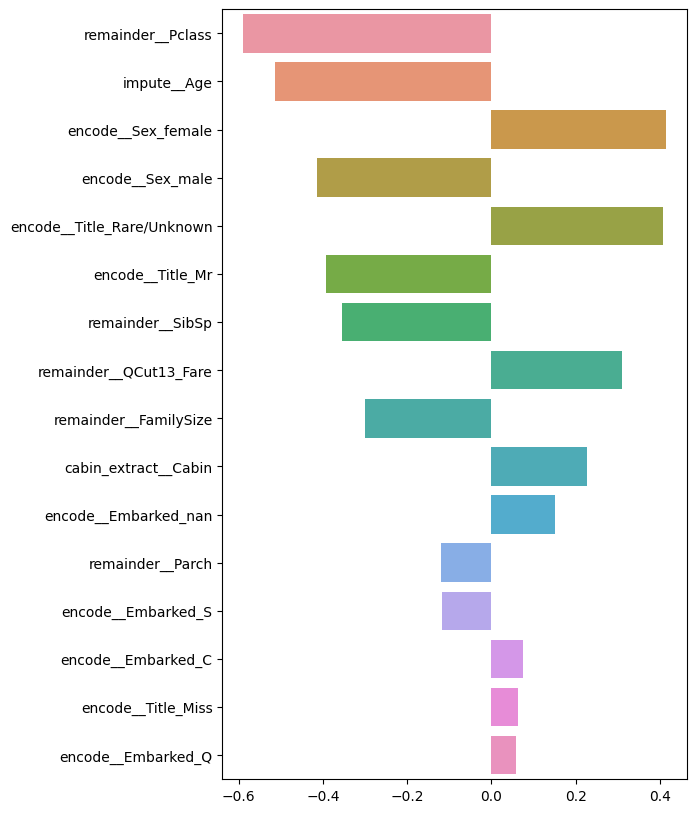

In [33]:
plt.figure(figsize=(6,10))
modelling_pipeline.fit(trainX, trainy)

x_plt = modelling_pipeline.steps[-1][1].coef_.ravel()
x_plt_abs = np.abs(x_plt)
y_plt = Pipeline(modelling_pipeline.steps[:-1]).fit_transform(trainX).columns
_,xp,yp=list(zip(*sorted(list(zip(x_plt_abs, x_plt, y_plt)), 
                                  reverse=True)))

_=sns.barplot(x=list(xp),y=list(yp))

# <p style="background-color:DarkBlue;color:white;font-family:cursive ;font-size:110%;text-align:center;border-radius: 15px 50px;">9. Tuning with Gridsearch</p>

# **GridsearchCV Hyperparameter Tuning**
Use GridSearchCV from scikit-learn to perform a grid search for hyperparameter tuning on the modelling_pipeline using cross-validation. The primary goal is to find the optimal combination of hyperparameters that maximizes the ROC-AUC score.

In [34]:
# %%time
# from sklearn.model_selection import GridSearchCV
# gscv_roc = GridSearchCV(estimator = modelling_pipeline,
#                         cv = skf,
#                         scoring='roc_auc',
#                         verbose=0,
#                         param_grid = {'logreg__C': [0.001,1,1000],
#                                       'prep__impute__strategy': ['mean', 'median'],
#                                       'discretize_Fare__n_bins': [5,13],
#                                      },
#                        )
# _=gscv_roc.fit(X = train.drop(['Survived'], axis=1),
#                y = train['Survived'],
#               )

In [35]:
# cv_res = pd.DataFrame({k:[[str(y)[:6] for y in x] for x in [gscv_roc.cv_results_['param_'+param_name].data for \
#                                       param_name in gscv_roc.param_grid]][i] for \
#                  i,k in enumerate(gscv_roc.param_grid)})
# cv_res['mean_cross_validated_ROC_AUC'] = gscv_roc.cv_results_['mean_test_score']
# cv_res['rank'] = gscv_roc.cv_results_['rank_test_score']
# cv_res.sort_values(by = ['rank'])

In [36]:
# best_score = gscv_roc.best_score_
# print(f"Best ROC-AUC Score: {best_score:.3f}")

In [37]:
# # Get the best hyperparameters from GridSearchCV
# best_hyperparameters = gscv_roc.best_params_

# # Update the logistic regression hyperparameter in the pipeline
# modelling_pipeline.set_params(logreg__C=best_hyperparameters['logreg__C'])

# # fit the model with the updated hyperparameters
# modelling_pipeline.fit(X=train.drop(['Survived'], axis=1),
#                        y=train['Survived'])

# <p style="background-color:DarkBlue;color:white;font-family:cursive ;font-size:110%;text-align:center;border-radius: 15px 50px;">10. Create Submission File</p>

In [38]:
modelling_pipeline.fit(X=train.drop(['Survived'], axis=1),
                       y=train['Survived'])
predictions = modelling_pipeline.predict(test)
sample['Survived'] = predictions
sample.to_csv('submission_1.csv', index=False)